# Imports

In [2]:
%matplotlib inline
import csv
import numpy as np
from sklearn import linear_model as LM
from sklearn.svm import SVR
import matplotlib.pyplot  as plt
import pandas as pd
from math import sqrt
from IPython.display import clear_output

# Functions

In [3]:
def mesureError(true_values,predicted_values):
    sommatory = []
    for i in range(len(true_values)):
        sommatory += [(predicted_values[i] - true_values[i])**2]
    return sqrt(sum(sommatory)/len(sommatory))

In [4]:
def predict(data,models):
    data = data.drop(columns="no_likes")
    rbf_prediction = models[0].predict(data)
    poly_prediction = models[1].predict(data)
    linear_prediction = models[2].predict(data)
    lasso_prediction = models[3].predict(data)
    liner_regressions_prediction = models[4].predict(data)
    return [rbf_prediction,poly_prediction,linear_prediction,lasso_prediction,liner_regressions_prediction]

In [5]:
def printModelErros(data,predictions):
    no_likes = data.no_likes
    print("Errors:")
    print("Vector RBF",mesureError(no_likes,predictions[0]))
    print("Vector Linear",mesureError(no_likes,predictions[1])) 
    print("Vector Polynomial",mesureError(no_likes,predictions[2]))
    print("Linear Lasso",mesureError(no_likes,predictions[3]))
    print("Linear Regression",mesureError(no_likes,predictions[4]))

In [6]:
def minimunError(data,predictions):
    no_likes = data.no_likes
    return min([mesureError(no_likes,predictions[0]),mesureError(no_likes,predictions[1]),mesureError(no_likes,predictions[2]),mesureError(no_likes,predictions[3]),mesureError(no_likes,predictions[4])])

In [7]:
def plotPredictions(data,predictions):
    index_ = list(range(len(data.index)))
    no_likes = data.no_likes
    plt.scatter(index_,no_likes,color='black',label='Data')
    plt.plot(index_,predictions[0],label='Vector Linear model')
    plt.plot(index_,predictions[1],label='Vector Polynomial model')
    plt.plot(index_,predictions[2],label='Vector RBF model')
    plt.plot(index_,predictions[3],label='Linear Lasso model')
    plt.plot(index_,predictions[4],color='purple',label='Linear Regression')
    plt.ylabel('no_likes')
    plt.xlabel("POST")
    plt.legend()

In [8]:
def Learn(data):
    index_ = list(range(len(data.index)))
    no_likes = data.no_likes
    data = data.drop(columns="no_likes")
    svr_lin = SVR(kernel='linear',C=1e3)
    svr_ploy = SVR(kernel='poly',C=1e3,degree=3)
    svr_rbf = SVR(kernel='rbf',C=1e3,gamma=0.1)
    reg_lass = LM.Lasso(alpha=0.1)
    reg_lin = LM.LinearRegression()

    svr_lin.fit(data,no_likes)
    svr_ploy.fit(data,no_likes)
    svr_rbf.fit(data,no_likes)
    reg_lass.fit(data,no_likes)
    reg_lin.fit(data,no_likes)
    
    return [svr_lin, svr_ploy ,svr_rbf ,reg_lass ,reg_lin]    

In [12]:
def shuffle(data):    
    data_shuffle = data.iloc[np.random.permutation(len(data))]
    dt = data_shuffle.reset_index(drop=True)
    dt = dt.set_index('ID')
    dtTrain = dt[0:int(len(dt)*0.70)]
    dtTest = dt[int(len(dt)*0.70):]
    return dtTrain, dtTest

# Load train data and clean it

In [13]:
instagram = pd.read_csv('train.csv')
instagram = instagram.drop(columns=['month','hour','page_total_likes'])
instagram = instagram[instagram.no_likes < 400]

# Shuffle data n times and get best model

|■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■| :: 100.0%
Errors:
('Vector RBF', 90.55188820035517)
('Vector Linear', 92.94300254024112)
('Vector Polynomial', 92.43590637151159)
('Linear Lasso', 84.89401997657468)
('Linear Regression', 84.9022862676378)


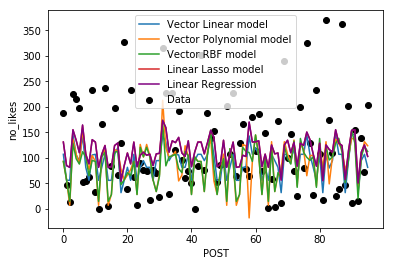

In [58]:
best_models = None
testData = None
bestError = 0
n = 5
for i in range(n):
    instaTrain, instaTest = shuffle(instagram)
    models = Learn(instaTrain)
    predictions = predict(instaTest,models)
    if(minimunError(instaTest,predictions) > bestError):
        bestError = minimunError(instaTest,predictions)
        best_models = models
        testData = instaTest
    clear_output()
    perc = (i+1)*1.0/n
    size = 50
    print("|"+("■"*int(perc*size))+("□"*(size-int(perc*size)))+"| :: "+str(perc*100)+"%")
    
predictions = predict(testData,best_models)
plotPredictions(testData,predictions)
printModelErros(testData,predictions)

# Save predicted data

In [50]:
test = pd.read_csv("test.csv")
test = test.drop(columns=['month','hour','page_total_likes'])
test = test.set_index('ID')
predictions = predict(test,best_models)
test['no_likes'] = predictions[3]
test.drop(columns=['type_of_post','category','weekday','paid']).to_csv('prediceted_best_error='+str(bestError)+'.csv')